In [36]:
%matplotlib inline
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [40]:
PLOT = Path('plot/')
PLOT.mkdir(exist_ok=True)

In [29]:
df = pd.read_csv('data/Sdf16_1a.txt', sep='\t', low_memory=False)
# df.to_csv('data/Sdf16_1a.csv')
print(df.shape)
df.head(n=2)

(18708, 260)


,LEAID,CENSUSID,FIPST,CONUM,CSA,CBSA,NAME,STNAME,STABBR,SCHLEV,...,FL_61V,FL_66V,FL_W01,FL_W31,FL_W61,FL_V95,FL_V02,FL_K14,FL_CE1,FL_CE2
0,0100002,N,1,01073,142,13820,Alabama Youth Services,Alabama,AL,N,...,M,M,M,M,M,M,M,M,M,M
1,0100005,01504840100000,1,01095,290,10700,Albertville City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M


# Q1

In [30]:
df.describe()

,FIPST,YEAR,CCDNF,CENFILE,V33,MEMBERSCH,TOTALREV,TFEDREV,C14,C15,...,_66V,W01,W31,W61,V95,V02,K14,CE1,CE2,WEIGHT
count,18708.000000,18708.0,18708.000000,18708.000000,18708.000000,18708.000000,1.870800e+04,1.870800e+04,1.870800e+04,1.870800e+04,...,1.870800e+04,1.870800e+04,1.870800e+04,1.870800e+04,1.870800e+04,1.870800e+04,1.870800e+04,1.870800e+04,1.870800e+04,18708.0
mean,29.495029,16.0,0.998396,0.786402,2683.242196,2667.760049,3.731826e+07,2.972137e+06,7.488747e+05,5.972777e+05,...,4.418570e+05,1.101326e+06,3.084204e+06,8.197737e+06,3.298232e+05,1.770253e+05,4.803566e+04,1.258707e+07,1.199914e+06,1.0
std,14.742041,0.0,0.040014,0.409857,12665.966250,12639.367419,2.439561e+08,1.945279e+07,6.657532e+06,3.305317e+06,...,7.292256e+06,9.463948e+06,2.173486e+07,3.382881e+07,1.498774e+06,1.595693e+06,4.037505e+05,6.769750e+07,7.943880e+06,0.0
min,1.000000,16.0,0.000000,0.000000,-3.000000,-9.000000,-2.000000e+00,-2.000000e+00,-2.000000e+00,-2.000000e+00,...,-2.000000e+00,-2.000000e+00,-2.000000e+00,-2.000000e+00,-2.000000e+00,-2.000000e+00,-2.000000e+00,-2.000000e+00,-2.000000e+00,1.0
25%,18.000000,16.0,1.000000,1.000000,182.000000,181.000000,2.822000e+06,1.537500e+05,1.400000e+04,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,1.630000e+05,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,1.0
50%,30.000000,16.0,1.000000,1.000000,641.000000,630.000000,9.177500e+06,5.760000e+05,1.260000e+05,5.800000e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,1.854000e+06,3.000000e+03,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,1.0
75%,40.000000,16.0,1.000000,1.000000,2003.000000,1972.000000,2.885050e+07,1.815000e+06,4.160000e+05,3.730000e+05,...,0.000000e+00,2.540000e+05,2.480000e+05,6.142500e+06,2.100000e+05,2.400000e+04,0.000000e+00,6.289000e+06,4.850000e+05,1.0
max,56.000000,16.0,1.000000,1.000000,981667.000000,981290.000000,2.744836e+10,1.739101e+09,6.562260e+08,2.910520e+08,...,8.700000e+08,8.724840e+08,1.085345e+09,2.887956e+09,7.966600e+07,1.556730e+08,1.577900e+07,2.768580e+09,4.273440e+08,1.0


In [31]:
rev = df[(df['TFEDREV']>0) & (df['V33']>0)].copy()
rev = rev.groupby('STABBR')[['TFEDREV', 'V33']].sum().reset_index()
rev['avg'] = rev['TFEDREV'] / rev['V33']
rev = rev.sort_values(by='avg', ascending=False)
rev.head(n=5)

,STABBR,TFEDREV,V33,avg
7,DC,224326000,82974,2703.569793
0,AK,307320000,132477,2319.798908
18,LA,1115619000,716650,1556.713877
32,NM,516289000,334960,1541.345235
41,SD,196644000,134045,1466.999888


In [32]:
rev = rev.sort_values(by='TFEDREV', ascending=False)
rev.head(n=5)

,STABBR,TFEDREV,V33,avg
4,CA,7621532000,6203660,1228.554112
43,TX,5907429000,5296482,1115.349585
34,NY,3362525000,2591976,1297.282459
9,FL,3147329000,2776933,1133.383124
14,IL,2122994000,2030075,1045.771215


In [42]:
fig = go.Figure(data=go.Choropleth(
    locations = rev['STABBR'],
    z = rev['TFEDREV'].astype('float'),
    locationmode='USA-states',
    colorscale='Blues',
    colorbar_title='USD',
))
fig.update_layout(
    title_text='US states by total educational fundings',
    geo_scope='usa',
)
fig.write_image(str(PLOT / 'total_edu.jpg'))
fig.show()

In [43]:
fig = go.Figure(data=go.Choropleth(
    locations = rev['STABBR'],
    z = rev['avg'].astype('float'),
    locationmode='USA-states',
    colorscale='Blues',
    colorbar_title='USD',
))
fig.update_layout(
    title_text='US states by average educational fundings',
    geo_scope='usa',
)
fig.write_image(str(PLOT / 'avg_edu.jpg'))
fig.show()

# Q2

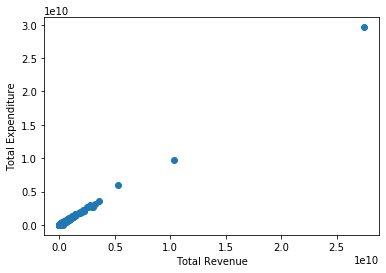

In [48]:
plt.scatter(df['TOTALREV'], df['TOTALEXP'])
plt.xlabel('Total Revenue')
plt.ylabel('Total Expenditure')
plt.savefig(PLOT / 'revenue_expenditure.jpg')
plt.show()

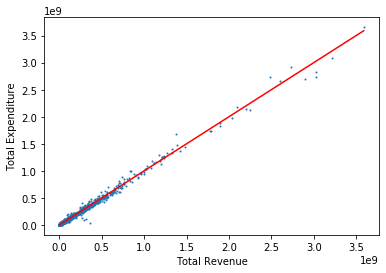

In [47]:
df2 = df[df['TOTALREV'] <0.5*1e10]
plt.scatter(df2['TOTALREV'], df2['TOTALEXP'], s=1)
plt.xlabel('Total Revenue')
plt.ylabel('Total Expenditure')

p2 = max(max(df2['TOTALREV']), max(df2['TOTALREV']))
plt.plot([0,p2],[0,p2], color='red')

plt.savefig(PLOT / 'revenue_expenditure_filtered.jpg')
plt.show()

In [10]:
deb = df[(df['TOTALEXP']>0) & (df['TOTALREV']>0)].copy()
deb['debt'] = deb['TOTALEXP'] - deb['TOTALREV']
deb = deb.groupby('STABBR')[['debt', 'V33']].sum().reset_index()
deb['avg_debt'] = deb['debt'] / deb['V33']
deb = deb.sort_values(by='avg_debt', ascending=False)
deb.head()

,STABBR,debt,V33,avg_debt
28,ND,175246000,108322,1617.824634
7,DC,107139000,82955,1291.531553
0,AK,128323000,132477,968.643614
29,NE,241611000,315520,765.754944
23,MN,597232000,861866,692.952269


In [49]:
fig = go.Figure(data=go.Choropleth(
    locations = deb['STABBR'],
    z = deb['avg_debt'].astype('float'),
    locationmode='USA-states',
    colorscale='Blues',
    colorbar_title='USD',
))
fig.update_layout(
    title_text='US states by average debt',
    geo_scope='usa',
)
fig.write_image(str(PLOT / 'avg_debt.jpg'))
fig.show()

# Q3

In [12]:
import re

In [13]:
df_math = pd.read_csv('data/math-achievement-lea-sy2015-16.csv', low_memory=False)
df_math.head(n=5)

,STNAM,FIPST,LEAID,LEANM,DATE_CUR,ALL_MTH00NUMVALID_1516,ALL_MTH00PCTPROF_1516,MAM_MTH00NUMVALID_1516,MAM_MTH00PCTPROF_1516,MAS_MTH00NUMVALID_1516,...,MIG_MTH05NUMVALID_1516,MIG_MTH05PCTPROF_1516,MIG_MTH06NUMVALID_1516,MIG_MTH06PCTPROF_1516,MIG_MTH07NUMVALID_1516,MIG_MTH07PCTPROF_1516,MIG_MTH08NUMVALID_1516,MIG_MTH08PCTPROF_1516,MIG_MTHHSNUMVALID_1516,MIG_MTHHSPCTPROF_1516
0,ALABAMA,1,100005,Albertville City,14APR17,2638,42,5,PS,12,...,28,LE20,16,LE20,19,21-39,20,LE20,8,LT50
1,ALABAMA,1,100006,Marshall County,14APR17,3003,39,16,21-39,13,...,6,LT50,4,PS,4,PS,4,PS,2,PS
2,ALABAMA,1,100007,Hoover City,14APR17,7356,66,8,GE50,515,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALABAMA,1,100008,Madison City,14APR17,5482,72,30,60-79,501,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ALABAMA,1,100011,Leeds City,14APR17,1024,37,1,PS,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
def impute_cell(cell):
    if cell == 'PS':
        return 0
    if cell == '' or cell == '.' or cell is np.nan:
        return 0
    m = re.match(r'(\d+)-(\d+)', cell)
    if m is not None:
        a, b = m.groups()
        a, b = int(a), int(b)
        return (a+b)/2
    m = re.match(r'LE(\d+)', cell)
    if m is not None:
        a, = m.groups()
        a = int(a)
        return (0+a)/2
    m = re.match(r'LT(\d+)', cell)
    if m is not None:
        a, = m.groups()
        a = int(a)
        return (0+a-1)/2
    m = re.match(r'GE(\d+)', cell)
    if m is not None:
        a, = m.groups()
        a = int(a)
        return (a+100)/2
    m = re.match(r'GT(\d+)', cell)
    if m is not None:
        a, = m.groups()
        a = int(a)
        return (100+a+1)/2
    return int(cell)
def impute_col(col):
    return list(map(impute_cell, col))

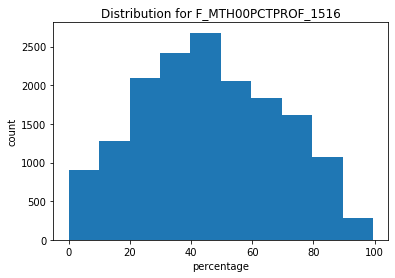

In [51]:
new_cols = impute_col(df_math.F_MTH00PCTPROF_1516)
plt.hist(new_cols, bins=10)
plt.xlabel('percentage')
plt.ylabel('count')
plt.title('Distribution for F_MTH00PCTPROF_1516')
plt.savefig('Distribution_for_F_MTH00PCTPROF_1516')
plt.show()

# Q4

In [16]:
cut = sum(df['TFEDREV']) * 0.15
cut

8340410870.7

In [17]:
df2 = df[['LEAID','STABBR','TOTALREV','TOTALEXP','V33']].copy()
df2 = df2[0<df2['V33']]
df2['profit'] = df2['TOTALREV'] - df2['TOTALEXP']
df2['avg_profit'] = df2['profit'] / df2['V33']
df2 = df2.sort_values('avg_profit', ascending=True)
df2.head()

,LEAID,STABBR,TOTALREV,TOTALEXP,V33,profit,avg_profit
17001,4845840,TX,1998000,14744000,103,-12746000,-123747.572816
737,0400941,AZ,1083000,8763000,127,-7680000,-60472.440945
16619,4830480,TX,14224000,26976000,213,-12752000,-59868.544601
16312,4819020,TX,13522000,30690000,360,-17168000,-47688.888889
18058,5308430,WA,67000,209000,3,-142000,-47333.333333


In [18]:
total_profit = sum(df2['profit'])
total_profit, total_profit - cut

(4050456000, -4289954870.7)

In [19]:
profits = df2['profit']
pos_profits = profits[profits>0]
total_pos_profits = sum(pos_profits)
total_pos_profits, total_pos_profits-cut

(26048208000, 17707797129.3)

In [20]:
def get_cut(profit):
    if profit < 0:
        return 0
    return (cut / total_pos_profits) * profit
df['profit'] = df['TOTALREV'] - df['TOTALEXP']
df['cut'] = list(map(get_cut, list(df['profit'])))
df[['LEAID', 'cut']].head(n=10)

,LEAID,cut
0,0100002,0.000000e+00
1,0100005,9.660173e+05
2,0100006,0.000000e+00
3,0100007,8.337783e+05
4,0100008,1.528273e+06
5,0100009,0.000000e+00
6,0100011,0.000000e+00
7,0100012,1.280765e+05
8,0100013,0.000000e+00
9,0100015,0.000000e+00
